<a href="https://colab.research.google.com/github/safranco8/ayvd-entregables-grupo-31/blob/main/20220524_Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2022**

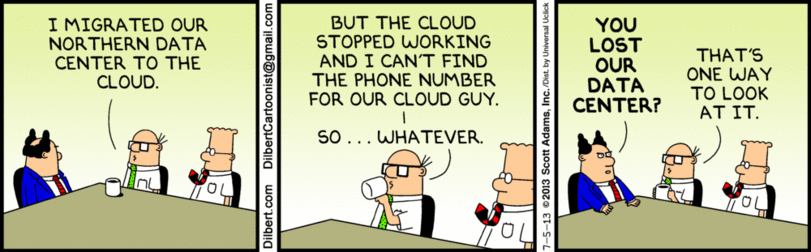

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
#10 Importación de librerias

import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
#20 Lectura del conjunto de datos original, en formato CSV
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#30 Obtención del conjunto de datos procesados en Entregable 1, en formato CSV 

!wget https://raw.githubusercontent.com/safranco8/ayvd-entregables-grupo-31/main/AEyC/melb_data_extended_grupo31.csv

--2022-05-25 00:03:03--  https://raw.githubusercontent.com/safranco8/ayvd-entregables-grupo-31/main/AEyC/melb_data_extended_grupo31.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2680131 (2.6M) [text/plain]
Saving to: ‘melb_data_extended_grupo31.csv.1’

melb_data_extended_ 100%[===================>]   2.56M  --.-KB/s    in 0.04s   

2022-05-25 00:03:03 (66.1 MB/s) - ‘melb_data_extended_grupo31.csv.1’ saved [2680131/2680131]



In [ ]:
#40 Lectura del conjunto de datos procesados en Entregable 1, en formato CSV 

melb_grupo31_df = pandas.read_csv('melb_data_extended_grupo31.csv')
melb_grupo31_df[:3]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Lattitude,Longtitude,Regionname,Propertycount,avg_price,avg_monthly_price,avg_weekly_price,avg_review_scores_rating,zipcode_count,avg_weekly_price_q
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,-37.7996,144.9984,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,-37.8079,144.9934,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,-37.8093,144.9944,Northern Metropolitan,4019.0,130.62,2187.03,605.15,95.29,258.0,"(590.0, 606.75]"


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
#50 Selección de una variable categórica y una numérica
categorical_cols = ['Type']
numerical_cols = ['Rooms']

In [ ]:
#60 
melb_df[categorical_cols].nunique()

Type    3
dtype: int64

In [ ]:
#70
# Check for nulls
melb_df[categorical_cols].isna().sum()

Type    0
dtype: int64

In [ ]:
#80
melb_df.value_counts('Type')

Type
h    9449
u    3017
t    1114
dtype: int64

In [ ]:
#90
melb_df.value_counts('Rooms')

Rooms
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
dtype: int64

#CONSIGNA =
###Ejercicio 1: Encoding

1.   Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto **BuildingArea** y **YearBuilt**, que volveremos a imputar más adelante.



In [ ]:
#100 Exploramos las columnas y sus tipos de datos

for column in melb_grupo31_df.columns:
    print(column, "---", melb_grupo31_df[column].dtype)

index --- int64
Suburb --- object
Address --- object
Rooms --- int64
Type --- object
Price --- float64
Method --- object
SellerG --- object
Date --- object
Distance --- float64
Postcode --- float64
Bedroom2 --- float64
Bathroom --- float64
Car --- float64
Landsize --- float64
BuildingArea --- float64
YearBuilt --- float64
CouncilArea --- object
Lattitude --- float64
Longtitude --- float64
Regionname --- object
Propertycount --- float64
avg_price --- float64
avg_monthly_price --- float64
avg_weekly_price --- float64
avg_review_scores_rating --- float64
zipcode_count --- float64
avg_weekly_price_q --- object


In [ ]:
#110 Según la consigna, eliminamos las columnas BuildingArea y YearBuilt
#Verificamos las columnas

melb_grupo31_reduced_df = melb_grupo31_df.copy()

del melb_grupo31_reduced_df['BuildingArea']
del melb_grupo31_reduced_df['YearBuilt']

for column in melb_grupo31_reduced_df.columns:
    print(column, "---", melb_grupo31_reduced_df[column].dtype)


index --- int64
Suburb --- object
Address --- object
Rooms --- int64
Type --- object
Price --- float64
Method --- object
SellerG --- object
Date --- object
Distance --- float64
Postcode --- float64
Bedroom2 --- float64
Bathroom --- float64
Car --- float64
Landsize --- float64
CouncilArea --- object
Lattitude --- float64
Longtitude --- float64
Regionname --- object
Propertycount --- float64
avg_price --- float64
avg_monthly_price --- float64
avg_weekly_price --- float64
avg_review_scores_rating --- float64
zipcode_count --- float64
avg_weekly_price_q --- object


In [ ]:
#120 Exploramos la cantidad de registros

len(melb_grupo31_reduced_df.index) 

12901

# CONSIGNA =
###Ejercicio 1: Encoding

2.   Aplicar una codificación **One-hot encoding** a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.
**Algunas opciones:**
 

1.   Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 




In [ ]:
#130 Seleccionamos los grupos de columnas categoricas y numéricas

feature_cols = ['Suburb', 'Type', 'Bedroom2', 'Bathroom', 'Car', 'Regionname']
numeric_cols = ['Price','Landsize','Distance','avg_price','avg_monthly_price','avg_weekly_price','avg_review_scores_rating']

In [ ]:
#140 Aplicamos One Hot Encoder a todas las columnas de variable categórica

from sklearn.preprocessing import OneHotEncoder

encoderC = OneHotEncoder(sparse=False)
encoderC.fit(melb_grupo31_reduced_df[feature_cols])

encoded_types = encoderC.transform(melb_grupo31_reduced_df[feature_cols])
encoded_types[:10]
#print(encoded_types)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#150 Se puede observar que el One Hot Encoder ha hecho que se pierdan el nombre de las columnas
# Por ello al generar el Dataframe a partir de este, sigue sin nombre de las columnas

encoded_df = pandas.DataFrame(encoded_types)
encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,347,348,349,350,351,352,353,354,355,356
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#160 Recuperamos el nombre de las columnas con el parametro ".categories_" para poder agregarlo al Dataframe
#NOTA: hay un arreglo por cada una de las variables categoricas

columna = list(encoderC.categories_)
columna

[array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
        'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
        'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
        'Avondale Heights', 'Bacchus Marsh', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaconsfield',
        'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh',
        'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn',
        'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia',
        'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East',
        'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick',
        'Brunswick East', 'Brunswick West', 'Bulleen', 'Bullengarook',
        'Bundoora', 'Burnley', 'Burnside', 'Burnside Heights', 'Burwood',
        'Burwood East', 'Cairnlea', 'Camberwell', 'Campbellfield',
        'Canterbury', 'Carlton

In [ ]:
# 170 Recupero todos los nombre de columnas en un unico arreglo para luego agregarlo al Dataframe
# Para ello recorro todos los arreglos que hay en "columna" y los guardo en "nombre_cols"
# Los nombre de columna van a contener el nombre original de la columna mas el valor de la categoria generada por One Hot Encoder
# siguiendo el formato: "<nombre_categoría>: <categoría>"

nombre_cols = []
for i in range(len(feature_cols)):
  for j in range(len(columna[i])):
    nombre_cols.append(str(feature_cols[i]) + ": " + str(columna[i][j]))

nombre_cols

['Suburb: Abbotsford',
 'Suburb: Aberfeldie',
 'Suburb: Airport West',
 'Suburb: Albanvale',
 'Suburb: Albert Park',
 'Suburb: Albion',
 'Suburb: Alphington',
 'Suburb: Altona',
 'Suburb: Altona Meadows',
 'Suburb: Altona North',
 'Suburb: Ardeer',
 'Suburb: Armadale',
 'Suburb: Ascot Vale',
 'Suburb: Ashburton',
 'Suburb: Ashwood',
 'Suburb: Aspendale',
 'Suburb: Aspendale Gardens',
 'Suburb: Attwood',
 'Suburb: Avondale Heights',
 'Suburb: Bacchus Marsh',
 'Suburb: Balaclava',
 'Suburb: Balwyn',
 'Suburb: Balwyn North',
 'Suburb: Bayswater',
 'Suburb: Bayswater North',
 'Suburb: Beaconsfield',
 'Suburb: Beaconsfield Upper',
 'Suburb: Beaumaris',
 'Suburb: Bellfield',
 'Suburb: Bentleigh',
 'Suburb: Bentleigh East',
 'Suburb: Berwick',
 'Suburb: Black Rock',
 'Suburb: Blackburn',
 'Suburb: Blackburn North',
 'Suburb: Blackburn South',
 'Suburb: Bonbeach',
 'Suburb: Boronia',
 'Suburb: Box Hill',
 'Suburb: Braybrook',
 'Suburb: Briar Hill',
 'Suburb: Brighton',
 'Suburb: Brighton East'

In [ ]:
#180 Renombramos las columnas del Dataframe para que ahora tengan un nombre entendible
melb_onehotencode_df = pandas.DataFrame(encoded_types)
melb_onehotencode_df.columns = nombre_cols
melb_onehotencode_df.head()


,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,Suburb: Altona,Suburb: Altona Meadows,Suburb: Altona North,...,Car: 10.0,Car: nan,Regionname: Eastern Metropolitan,Regionname: Eastern Victoria,Regionname: Northern Metropolitan,Regionname: Northern Victoria,Regionname: South-Eastern Metropolitan,Regionname: Southern Metropolitan,Regionname: Western Metropolitan,Regionname: Western Victoria
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#190 Agregamos las variables numéricas al Dataframe
melb_onehotencode_full_df = pandas.DataFrame(numpy.hstack([melb_onehotencode_df,melb_grupo31_reduced_df[numeric_cols]]))
melb_onehotencode_full_df.columns = numpy.concatenate([nombre_cols, numeric_cols]).ravel()
melb_onehotencode_full_df = pandas.DataFrame(melb_onehotencode_full_df)

melb_onehotencode_full_df.head()

,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,Suburb: Altona,Suburb: Altona Meadows,Suburb: Altona North,...,Regionname: Southern Metropolitan,Regionname: Western Metropolitan,Regionname: Western Victoria,Price,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price,avg_review_scores_rating
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1480000.0,202.0,2.5,130.62,2187.03,605.15,95.29
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1035000.0,156.0,2.5,130.62,2187.03,605.15,95.29
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1465000.0,134.0,2.5,130.62,2187.03,605.15,95.29
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,850000.0,94.0,2.5,130.62,2187.03,605.15,95.29
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1600000.0,120.0,2.5,130.62,2187.03,605.15,95.29


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_onehotencode_full_df.copy(deep=True)
melb_data_mice['YearBuilt'] = melb_grupo31_df['YearBuilt']
melb_data_mice['BuildingArea'] = melb_grupo31_df['BuildingArea']

#ORIGINAL
#mice_imputer = IterativeImputer(random_state=1, estimator=KNeighborsRegressor(n_neighbors=5))
mice_imputer = IterativeImputer(random_state=1, estimator=KNeighborsRegressor(n_neighbors=5, weights='distance'))

melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
#melb_data_mice['YearBuilt']
melb_data_mice[['YearBuilt', 'BuildingArea']]
 

,YearBuilt,BuildingArea
0,1976.0,107.80000
1,1900.0,79.00000
2,1900.0,150.00000
3,1976.0,107.80000
4,2014.0,142.00000
...,...,...
12896,1976.0,107.80000
12897,1981.0,162.80000
12898,1995.0,133.00000
12899,1997.0,229.21928


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

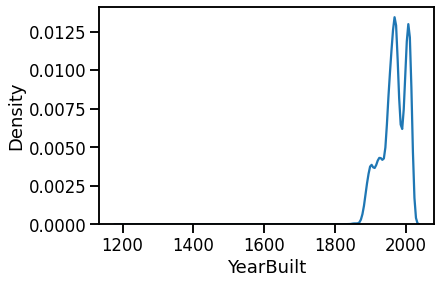

In [ ]:
seaborn.kdeplot(data=melb_grupo31_df, x='YearBuilt')

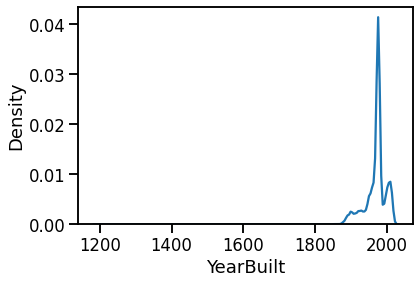

In [ ]:
seaborn.kdeplot(data=melb_data_mice, x='YearBuilt')

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN' # over YearBuilt and BuildingArea'

#melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build = melb_grupo31_df.YearBuilt.dropna().to_frame()
#melb_year_build = melb_df.YearBuilt.to_frame()
#melb_year_build = melb_grupo31_df.YearBuilt.to_frame()

melb_year_build['Imputation'] = 'Original'

melb_year_build.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7765 entries, 1 to 12900
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YearBuilt   7765 non-null   float64
 1   Imputation  7765 non-null   object 
dtypes: float64(1), object(1)
memory usage: 182.0+ KB


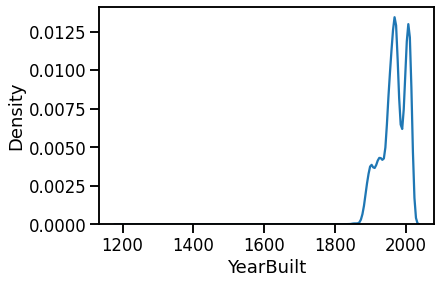

In [ ]:
seaborn.kdeplot(data=melb_year_build, x='YearBuilt')

In [ ]:
mice_year_built.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YearBuilt   12901 non-null  float64
 1   Imputation  12901 non-null  object 
dtypes: float64(1), object(1)
memory usage: 201.7+ KB


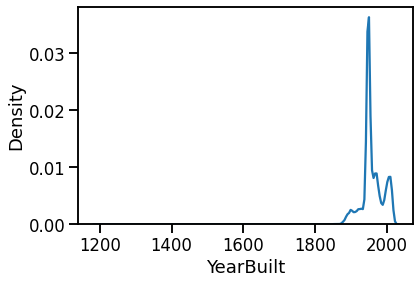

In [ ]:
seaborn.kdeplot(data=mice_year_built, x='YearBuilt')

In [ ]:
data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True)

#data.reindex()
#data = data.loc[:,~data.columns.duplicated(keep='first')]
#data.reset_index()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20666 entries, 0 to 20665
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YearBuilt   20666 non-null  float64
 1   Imputation  20666 non-null  object 
dtypes: float64(1), object(1)
memory usage: 323.0+ KB


In [ ]:
data.head()

,YearBuilt,Imputation
0,1948.4,KNN
1,1900.0,KNN
2,1900.0,KNN
3,1948.4,KNN
4,2014.0,KNN


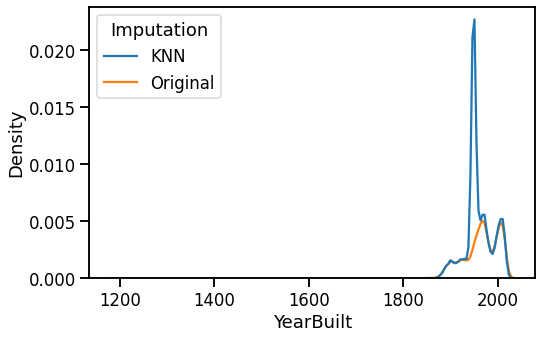

In [ ]:
fig = plt.figure(figsize=(8, 5))
seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
melb_data_mice

,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,Suburb: Altona,Suburb: Altona Meadows,Suburb: Altona North,...,Regionname: Western Victoria,Price,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price,avg_review_scores_rating,YearBuilt,BuildingArea
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1480000.0,202.0,2.5,130.62,2187.03,605.15,95.29,1948.4,177.2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1035000.0,156.0,2.5,130.62,2187.03,605.15,95.29,1900.0,79.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1465000.0,134.0,2.5,130.62,2187.03,605.15,95.29,1900.0,150.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,850000.0,94.0,2.5,130.62,2187.03,605.15,95.29,1948.4,177.2
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1600000.0,120.0,2.5,130.62,2187.03,605.15,95.29,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,582000.0,256.0,16.5,92.29,NaN,400.00,95.30,1948.4,177.2
12897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1245000.0,652.0,16.7,124.03,1901.61,526.35,93.09,1981.0,193.0
12898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1031000.0,333.0,6.8,191.09,2119.75,612.25,95.02,1995.0,133.0
12899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1170000.0,436.0,6.8,191.09,2119.75,612.25,95.02,1997.0,216.6


In [ ]:
pca_init = numpy.nan_to_num(melb_data_mice.copy())
#Escalar la data para PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_pca = scaler.fit_transform(pca_init)
numpy.max(scaled_pca), numpy.min(scaled_pca)
scaled_pca_df = pandas.DataFrame(scaled_pca)
scaled_pca_df.columns = numpy.concatenate([nombre_cols, numeric_cols, ["YearBuilt", "BuildingArea"]]).ravel()
scaled_pca_df

,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,Suburb: Altona,Suburb: Altona Meadows,Suburb: Altona North,...,Regionname: Western Victoria,Price,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price,avg_review_scores_rating,YearBuilt,BuildingArea
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.265306,-0.994684,-0.896050,-0.655847,-0.565203,-0.458883,0.910576,0.830657,-0.992039
1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-0.138322,-0.995895,-0.896050,-0.655847,-0.565203,-0.458883,0.910576,0.712895,-0.996451
2,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.251701,-0.996474,-0.896050,-0.655847,-0.565203,-0.458883,0.910576,0.712895,-0.993261
3,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-0.306122,-0.997526,-0.896050,-0.655847,-0.565203,-0.458883,0.910576,0.830657,-0.992039
4,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.374150,-0.996842,-0.896050,-0.655847,-0.565203,-0.458883,0.910576,0.990268,-0.993620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-0.549206,-0.993263,-0.313929,-0.756837,-1.000000,-0.642325,0.910777,0.830657,-0.992039
12897,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.052154,-0.982842,-0.305613,-0.673210,-0.621946,-0.529345,0.866466,0.909976,-0.991329
12898,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-0.141950,-0.991237,-0.717256,-0.496522,-0.578579,-0.452534,0.905163,0.944039,-0.994024
12899,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-0.015873,-0.988526,-0.717256,-0.496522,-0.578579,-0.452534,0.905163,0.948905,-0.990268


In [ ]:
n = min(20, scaled_pca.shape[0])

from sklearn.decomposition import PCA
pca = PCA(n)
pca.fit(scaled_pca)
proyected_features = pca.transform(scaled_pca)
proyected_features

array([[ 1.72470514, -1.20681568,  1.56082024, ..., -0.004639  ,
        -0.39174116, -0.01498422],
       [ 1.029023  , -1.37612576,  1.49704564, ..., -0.0159455 ,
        -0.09590075, -0.04803456],
       [-1.55888072, -0.68706275,  0.79850484, ...,  0.11070474,
        -0.20430924, -0.07808192],
       ...,
       [-2.54317999, -0.08367911, -0.53684317, ..., -0.1506843 ,
        -0.15432201, -0.01765926],
       [-1.87765294, -0.30712535, -0.31276126, ..., -0.24475025,
        -0.25369463, -0.01238557],
       [ 0.45184962, -0.82962523,  0.66249531, ...,  0.36089667,
         0.09457332, -0.05083465]])

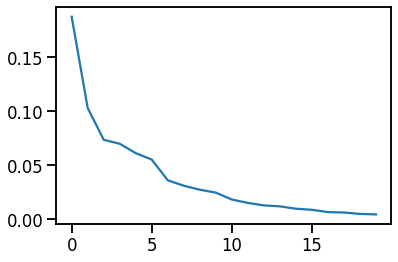

In [ ]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)

In [ ]:
#Agrego las primeras 5 componentes al df inicial
melb_grupo31_reduced_df[['pca1_scaled','pca2_scaled','pca3_scaled','pca4_scaled', 'pca5_scaled']] = proyected_features[:,:5]

melb_grupo31_reduced_df

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,avg_monthly_price,avg_weekly_price,avg_review_scores_rating,zipcode_count,avg_weekly_price_q,pca1_scaled,pca2_scaled,pca3_scaled,pca4_scaled,pca5_scaled
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,2187.03,605.15,95.29,258.0,"(590.0, 606.75]",1.724705,-1.206816,1.560820,-0.238771,-0.267901
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,2187.03,605.15,95.29,258.0,"(590.0, 606.75]",1.029023,-1.376126,1.497046,-1.339927,-0.598158
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2187.03,605.15,95.29,258.0,"(590.0, 606.75]",-1.558881,-0.687063,0.798505,1.303817,-1.311843
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2187.03,605.15,95.29,258.0,"(590.0, 606.75]",-0.757721,-0.556019,0.904094,2.460272,-0.962369
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,2187.03,605.15,95.29,258.0,"(590.0, 606.75]",-0.915480,-1.982939,-0.157293,-0.709165,-1.563138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,...,NaN,400.00,95.30,21.0,"(399.89, 422.876]",-2.286575,-0.447550,0.630169,0.750323,-1.598591
12897,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,...,1901.61,526.35,93.09,189.0,"(525.43, 553.15]",-2.422032,1.212172,1.255455,-0.653836,0.402840
12898,13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,...,2119.75,612.25,95.02,74.0,"(606.75, 618.76]",-2.543180,-0.083679,-0.536843,0.779495,0.796209
12899,13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,...,2119.75,612.25,95.02,74.0,"(606.75, 618.76]",-1.877653,-0.307125,-0.312761,1.560502,1.242285


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_cat = encoder.fit_transform(melb_df[categorical_cols])

for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']


In [ ]:
# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))


Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


In [ ]:
# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])


In [ ]:

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.570984,1.531969


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transformaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
